In [59]:
from datetime import datetime, timedelta
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
df = pd.read_csv('gitter_pandas.csv')
df.head()
count = df.groupby('user').count()
test = count.sort_values(['count'], ascending=[False])
test
test.to_csv('count.csv', sep='\t')

In [60]:
df['date'] = pd.to_datetime(df['date'], format='%m/%d/%y')

In [61]:
df.columns


Index([u'user', u'text', u'date', u'count'], dtype='object')

In [62]:
df.set_index(['user', 'date'], inplace=True)

In [63]:
idx = pd.IndexSlice

In [64]:
df.head()

text  count
user     date                                                                
lossyrob 2015-03-31      Hey everyone. Welcome to the GeoTrellis room!      1
non      2015-03-31                                             hello!      1
         2015-03-31           (and goodbye -- it is quitting time now)      1
lossyrob 2015-03-31                                             adios!      1
         2015-03-31  @non btw did you get my email? I heard your co...      1

In [65]:
df.sort_index(inplace=True) # sort the dataframe by its indices
df.loc[idx[['lossyrob', 'non'], datetime(2015, 3, 31):datetime(2015,4,28)], 'text']

user      date      
lossyrob  2015-03-31        Hey everyone. Welcome to the GeoTrellis room!
          2015-03-31                                               adios!
          2015-03-31    @non btw did you get my email? I heard your co...
          2015-03-31                                               hahaha
          2015-04-01    @echeipesh was there anything in that Catalog ...
          2015-04-01             What was that refactor plan about again?
          2015-04-01    Also, I can_��t name things. Catalog is really...
          2015-04-01                                Reader/Writer traits.
          2015-04-01                              Store/ReadOnlyStore ick
          2015-04-01                                                right
          2015-04-01    yeah that makes sense to just throw it out the...
          2015-04-01                                                 nice
          2015-04-01    Basically a function that calls load(layerId: ...
          2015-04

## Getting values from multiindices

In [66]:
users = df.index.get_level_values('user').unique()

In [76]:
rob = df.loc['lossyrob'].resample('D').size() # we can drop the users level with access by .loc and a username
# rob

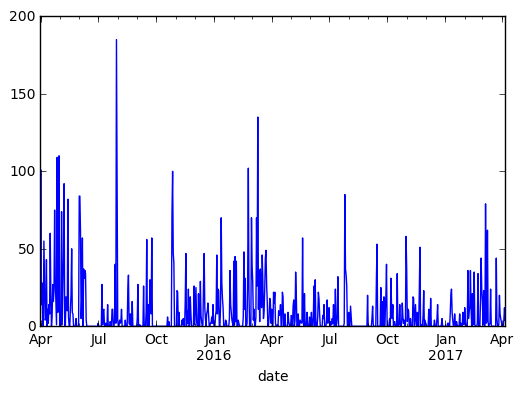

In [77]:
rob.plot()

In [12]:
# df.groupby(level='user').plot() # doesn't work -- graphics get mad so jupyter won't let you

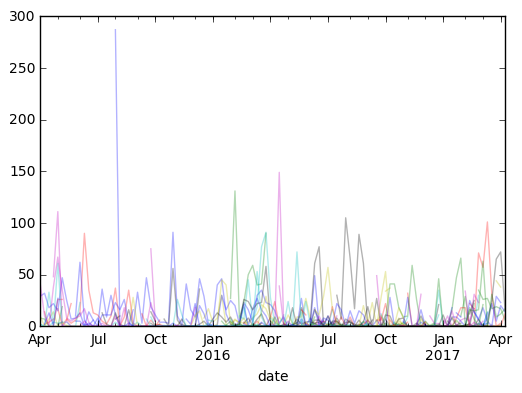

In [78]:
fig, ax = plt.subplots() # creates a canvas and an axis on that canvas to draw onto
for user in users:
    if user not in ['lossyrob', 'pomadchin']:
        df.loc[user].resample('1W').size().plot(ax=ax, alpha=0.3, legend=False)
ax

In [79]:
users

Index([u'ASellers', u'Charmatzis', u'DarkManiel', u'Elbehery', u'Leme2014',
       u'Leonhalt3141', u'Manuri', u'MichiB7_twitter', u'Prasannads',
       u'Ronald33',
       ...
       u'vsimko', u'walleyyang', u'willtemperley', u'wsf1990',
       u'xarmatzis_twitter', u'zaikin', u'zainab-ali', u'zakipatel',
       u'zeitalexgithub', u'zifeo'],
      dtype='object', name=u'user', length=154)

In [80]:
df.tail()

text  count
user  date                                                                
zifeo 2015-08-14  Failed tests are: `geotrellis.spark.io.accumul...      1
      2015-08-14  I guess that hadoop is because I didn_��t chan...      1
      2015-08-14  Sorry, it is the inverse. Index out of bounds ...      1
      2015-08-15                     thanks! I will finish tomorrow      1
      2015-08-17  @echeipesh do you have any ETL example of accu...      1

In [81]:
type(df)


pandas.core.frame.DataFrame

In [82]:
df = df.set_index('date')
month_plot = df.resample('d', how=sum).plot()
# fig = month_plot.get_figure()
plt.show()

KeyError: 'date'

In [83]:
plt.close()

In [84]:
user_group = df.groupby('user')
size = user_group.size()
size.sort_values(inplace=True)
size.plot()



KeyError: 'user'

In [85]:
df.reset_index('date', inplace = True)
df.head()

,date,text,count
user,,,
ASellers,2017-03-29,"Hi, I'm trying to determine if Geotrellis can ...",1
ASellers,2017-03-29,"Hi, @lossyrob - thanks for the help. That's r...",1
ASellers,2017-03-29,Appreciate any insight about a possible approach.,1
ASellers,2017-03-29,@lossyrob - that's helpful. Thank you very much.,1
ASellers,2017-03-30,@lossyrob - Thanks! That's really helpful.,1


In [87]:
minDate = df.groupby(level = 'user')['date'].min()
maxDate = df.groupby(level = 'user')['date'].max()

minMaxDate = pd.DataFrame({'minDate': minDate, 'maxDate': maxDate})

minMaxDate['diff'] = maxDate - minDate

minMaxDate.head()
minMaxDate.to_csv('minmax.csv', sep='\t')

## Matplotlib makin' bars (not implemented) :+1:

In [ ]:
minMaxDate.sort_values(by='minDate', inplace=True)

In [ ]:
minMaxDate = minMaxDate[minMaxDate['diff'] > timedelta(days=7)]

In [ ]:
from matplotlib.patches import Rectangle

In [ ]:
minMaxDate['minDateTS'] = minMaxDate['minDate'].map(lambda x: np.datetime64(x))
minMaxDate['diffTS'] = minMaxDate['diff'].map(lambda x: np.timedelta64(x))

In [37]:
minMaxDate.head()

NameError: name 'minMaxDate' is not defined

In [ ]:
ys = (np.linspace(0, 79, num=79) / 79)
rectangles = [
    Rectangle(xy=(minMaxDate.loc[r, 'minDateTS'], y),
             width=minMaxDate.loc[r, 'diffTS'],
             height= 1 / 79.) for r, y in zip(minMaxDate.index, ys)
]

In [ ]:
for rect in rectangles:
    ax2.add_patch(rect)

In [22]:
count = df.groupby('text').count()

In [23]:
count

,count
text,
\t`/data/geotrellis/proj4/src/main/java/org/osgeo/proj4j/util/PolarCoordinate.java:18: error: unmappable character for encoding ASCII\t`,1
\r\r\r\rI'm trying out the new Multiband spark-etl stuff that was committed yesterday and having tons of issues\r\r\r,1
"\r> PhotometricInterpretation = 3 (Palette Color).\r> ColorMap\r> Tag = 320 (140.H)\r> Type = SHORT\r> N = 3 * (2**BitsPerSample)\r> This field defines a Red-Green-Blue color map (often called a lookup table) for palette color images. In a palette-color image, a pixel value is used to index into an RGB-lookup table. For example, a palette-color pixel having a value of 0 would be displayed according to the 0th Red, Green, Blue triplet.\r> In a TIFF ColorMap, all the Red values come first, followed by the Green values, then the Blue values. In the ColorMap, black is represented by 0,0,0 and white is represented by 65535, 65535, 65535.",1
"\r@lossyrob I borrowed heavily from your Slippy map example you supplied me earlier on. I run a number of ops and feed the results to a extension of the SlippyTileWriter I created. Issue is I want to use different or custom Colorramps for different op results. I am including a code snippet below. I believe my limitation is programming in the scala environment but maybe you would have a pointer, I want to pass a dynamic ColorRamp value to the gtOut.tile.renderPng call and not sure the best way to extend the pattern/framework \ryou were using. Let me know if this is outside of the scope of this board. Thanks Chris\r\r```\r// Pyramiding up the zoom levels, write our tiles out to the local file system.\r val writeOp =\r Pyramid.upLevels( new RasterRDD(tiled, rasterMetaData), layoutScheme, zoom) { (rdd, z) =>\r\r val md = rdd.metaData\r\r // New Approach\r val writer = new SurgeIndexSlippyTileWriter[Tile](jobId) ({ (key, tile) =>\r\r // Tile is geotrellis.raster.Tile\r val extent = md.mapTransform(key)\r\r // Make geotrellis.raster.io.geotiff.SingleBandGeoTiff\r val gtOut= GeoTiff(tile, extent, WebMercator)\r\r gtOut.tile.renderPng( ColorRamps.BlueToRed ).bytes\r\r })\r\r new RasterRDD( writer.setupWrite(z, rdd), md)\r\r }\r\r // We've set up a set of Spark ""transformations"", but need to call an ""action"" to kick off the work.\r // An empty foreach call is enough to set the processing in motion.\r writeOp.foreach { x => }\r```",1
"\r@lossyrob I ingest landsat data with this code (https://github.com/lossyrob/landsat-demo/blob/master/ingest/src/main/scala/demo/LandsatIngest.scala). There is a problem that metadata writes only for the last image. As the result I can access with LayerReader only the layer with the last image. TileReader(ValuerReader) works fine for images visualization with some modification provided in the same repo. I want to query polygon or time range based on the whole layers images \r``` \rreaderSet.multiBandLayerReader.query[SpaceTimeKey, MultibandTile, TileLayerMetadata[SpaceTimeKey]](layer).where(Between(time1_joda, time2_joda)).toRDD \r``` \rand get result only for the the last image. The images that i write in one layer are have different time and extent range, maybe this could be a problem?\r ```\r val images =\r Array[String](\r ""data/bel2/LC81800192016108LGN00"",\r ""data/bel2/LC81780222014152LGN00"",\r ""data/bel2/LC81810242014157LGN00""\r )\r ```",1
"\r@schBen this path can be local or hdfs; `LayerId` consists of a `layerName` (juts a string) and of a zoom level. Before you can use reader, as @echeipesh pointed, you have to ingest tiles (S3, Accumulo, HDFS, Spark Files). \r\rTo save a certain `Tile` as png: \r\r```scala\rimport geotrellis.raster.render._\rval tile: Tile = ???\rval somePath = ""/test.png""\rtile.renderPng.write(somePath)\r``` \r\rAnd possible to save the whole `RDD` as png:\r\r```scala\rval rdd: RasterRDD[SpatialKey] = ???\rrdd.renderPng(layerId, ""s3://tile-bucket/{name}/{z}/{x}/{y}.png"")\r```\r\rAlso may be it would be helpful for you, there is an ndvi project: https://github.com/